# Curso de Machine Learning - Trabajo Práctico Final

## Guarnieri Victoria
___

**Objetivos**
- Poner en práctica los conceptos de aprendizaje automático supervisado y no supervisado.
- Familiarizarse con la adquisición, inspección y visualización de datos.
- Implementar, entrenar y validar los modelos vistos en clase
___

In [1]:
# Librerías
import mglearn
import graphviz
import pandas as pd 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn import neighbors, metrics, tree
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Librería de la consigna
from sklearn.datasets import load_wine

In [2]:
# Pequeño análisis exploratorio de los datos

wine = load_wine()

print(wine.target) # hay 3: 0, 1, 2

data = pd.DataFrame(wine.data, columns = wine.feature_names)
data

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


1. Construya 2 datasets, uno con los datos originales y otro con los datos correctamente escalados y/o normalizados. Divida ambos datasets en conjuntos de entrenamiento y de validación.

In [3]:
# Construyo 2 sets de datos

# data1: datos originales
# data2: escalados y normalizados con MinMaxScaler
data1 = wine.data
data2 = MinMaxScaler().fit(wine.data).transform(wine.data)

# Etiquetas
target = wine.target

In [4]:
# Divido ambos datasets en conjuntos de entrenamiento (training set) y validación (test set)

training_set1, test_set1, training_target, test_target = train_test_split(data1, wine.target, test_size = 0.2, random_state = 50)
training_set2, test_set2, _, _ = train_test_split(data2, wine.target, test_size = 0.2, random_state = 50)

2. Elija un valor de K y aplique el algoritmo de KNN en ambos datasets. Evalúe la precisión en ambos casos.

In [5]:
# KNN

# Elijo un valor de K
K = 10

# Creo una instancia del clasificador de vecinos cercanos, y paso los datos mediante fit()
# En este caso, asigno pesos uniformes, por default es weights = "uniform"
# Podría haber asignado pesos diferentes en función a la distancia usando el parámetro wights = 'distance'

# data1
Clasificador1 = neighbors.KNeighborsClassifier(K)
Clasificador1.fit(training_set1, training_target)

# data2
Clasificador2 = neighbors.KNeighborsClassifier(K)
Clasificador2.fit(training_set2, training_target)

# Realizo las predicciones correspondientes:
target_predicho1 = Clasificador1.predict(test_set1)
target_predicho2 = Clasificador2.predict(test_set2)

# Evalúo la presición en ambos casos:
Accuracy1 = metrics.accuracy_score(test_target, target_predicho1)
print(f"Precisión data1: {Accuracy1}") # ---> REVISAR POR QUÉ ES 0.0

Accuracy2 = metrics.accuracy_score(test_target, target_predicho2)
print(f"Precisión data2: {Accuracy2}")

Precisión data1: 0.6111111111111112
Precisión data2: 0.9722222222222222


C:\Users\vguar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\vguar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

La precisión es mejor para los datos normalizados.

3. Elija un valor de max_depth y aplique el algoritmo de Árboles de Decisión en ambos datasets. Evalúe la precisión en ambos casos.

In [6]:
# Árboles de Decision

# Elijo un valor Max_depth
Max_depth = 5

# data1
Tree1 = DecisionTreeClassifier(max_depth = Max_depth)
Tree1.fit(training_set1, training_target)
print(f"Presición 1: {Tree1.score(test_set1, test_target)}")

# data2
Tree2 = DecisionTreeClassifier(max_depth = Max_depth)
Tree2.fit(training_set2, training_target)
print(f"Presición 2: {Tree2.score(test_set2, test_target)}")

Presición 1: 0.8888888888888888
Presición 2: 0.9444444444444444


[Text(0.4090909090909091, 0.9, 'X[9] <= 3.82\ngini = 0.659\nsamples = 142\nvalue = [46, 57, 39]'),
 Text(0.18181818181818182, 0.7, 'X[11] <= 3.82\ngini = 0.04\nsamples = 49\nvalue = [1, 48, 0]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 48\nvalue = [0, 48, 0]'),
 Text(0.2727272727272727, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.6363636363636364, 0.7, 'X[6] <= 1.58\ngini = 0.581\nsamples = 93\nvalue = [45, 9, 39]'),
 Text(0.45454545454545453, 0.5, 'X[10] <= 0.97\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.36363636363636365, 0.3, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.5454545454545454, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8181818181818182, 0.5, 'X[12] <= 724.5\ngini = 0.256\nsamples = 53\nvalue = [45, 8, 0]'),
 Text(0.7272727272727273, 0.3, 'X[10] <= 0.83\ngini = 0.198\nsamples = 9\nvalue = [1, 8, 0]'),
 Text(0.6363636363636364, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.818181818181

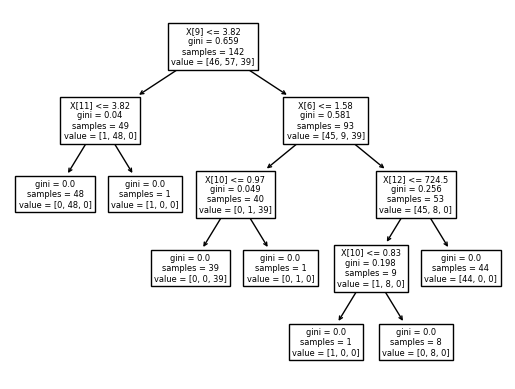

In [7]:
# Imprimo Tree1
tree.plot_tree(Tree1)

[Text(0.4090909090909091, 0.9, 'X[9] <= 0.217\ngini = 0.659\nsamples = 142\nvalue = [46, 57, 39]'),
 Text(0.18181818181818182, 0.7, 'X[12] <= 0.505\ngini = 0.04\nsamples = 49\nvalue = [1, 48, 0]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 48\nvalue = [0, 48, 0]'),
 Text(0.2727272727272727, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.6363636363636364, 0.7, 'X[6] <= 0.262\ngini = 0.581\nsamples = 93\nvalue = [45, 9, 39]'),
 Text(0.45454545454545453, 0.5, 'X[10] <= 0.398\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.36363636363636365, 0.3, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.5454545454545454, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8181818181818182, 0.5, 'X[12] <= 0.318\ngini = 0.256\nsamples = 53\nvalue = [45, 8, 0]'),
 Text(0.7272727272727273, 0.3, 'X[0] <= 0.564\ngini = 0.198\nsamples = 9\nvalue = [1, 8, 0]'),
 Text(0.6363636363636364, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(0.81818181

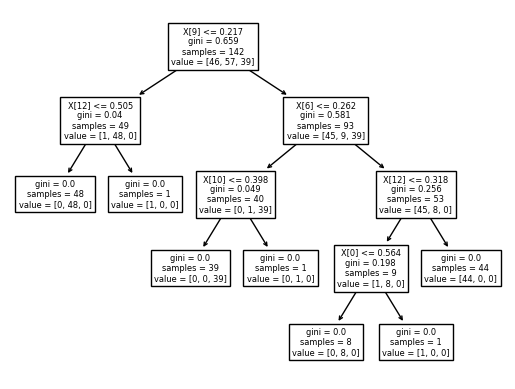

In [8]:
# Imprimo Tree2
tree.plot_tree(Tree2)

4. Tome los datos escalados y/o normalizados, reduzca la dimensión del problema a 2 utilizando PCA y grafique el conjunto resultante.

(178, 13)
(178, 2)


Text(0, 0.5, 'Componente principal 2')

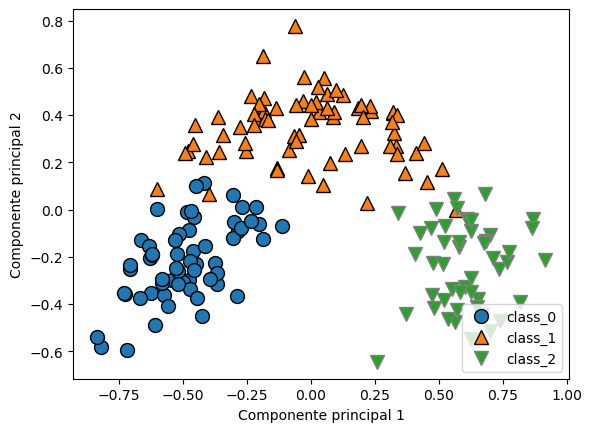

In [9]:
# PCA

pca = PCA(n_components = 2) 
pca.fit(data2)

wine_2D = pca.transform(data2)

# Imprimo las dimensionalidades: paso de un problema 178x13 a uno de 178x2
print(data2.shape)
print(wine_2D.shape)

# Grafico mediante la herramienta scatter discreto
mglearn.discrete_scatter(wine_2D[:,0], wine_2D[:,1], wine.target)
plt.legend(wine.target_names, loc = 'lower right')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')

5. Sin utilizar las etiquetas del dataset, elija un valor de K y aplique el algoritmo de KMeans sobre los datos transformados por PCA. Repita el procedimiento utilizando KMeans por mini-batches.

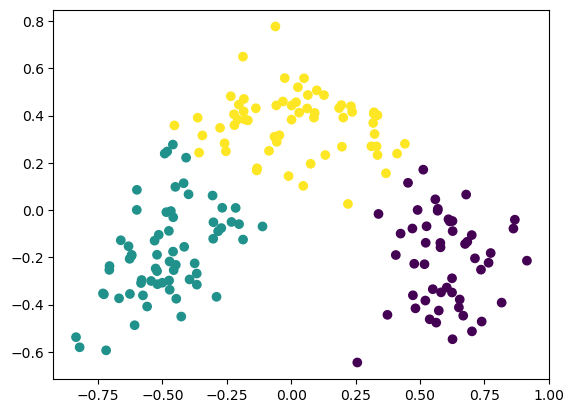

In [10]:
# KMeans

k_means = KMeans(n_clusters = 3, max_iter = 2000) 
k_means.fit(wine_2D)
 
Predic = k_means.predict(wine_2D)

plt.scatter(wine_2D[:, 0], wine_2D[:, 1], c = Predic)
plt.show()

C:\Users\vguar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


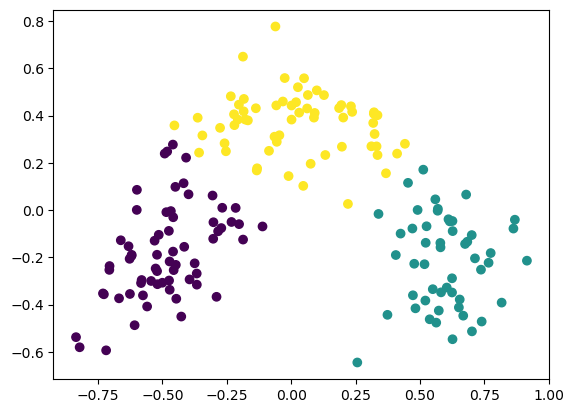

In [11]:
# MiniBatch

mini_batch = MiniBatchKMeans(n_clusters = 3, max_iter = 2000)
mini_batch.fit(wine_2D)
 
Predic = mini_batch.predict(wine_2D)

plt.scatter(wine_2D[:, 0], wine_2D[:, 1], c = Predic)
plt.show()